In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\FeynnLab\DataProject2\data.csv')
data.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
data = data.drop(['Unnamed: 0', 'Model'], axis = 1)
data.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
data1 = pd.read_csv(r'C:\Users\Admin\Desktop\FeynnLab\DataProject2\stateData.csv')
data1

,State/UT,Total EV
0,Andaman & Nicobar Island,190
1,Andhra Pradesh,67905
2,Arunachal Pradesh,28
3,Assam,120423
4,Bihar,161060
5,Chandigarh,7964
6,Chhattisgarh,54848
7,Delhi,233212
8,Goa,12615
9,Gujarat,138410


In [5]:
data.isna().sum()

Brand              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

## Which Brand is providing the Top Speed

<Axes: xlabel='TopSpeed_KmH', ylabel='Brand'>

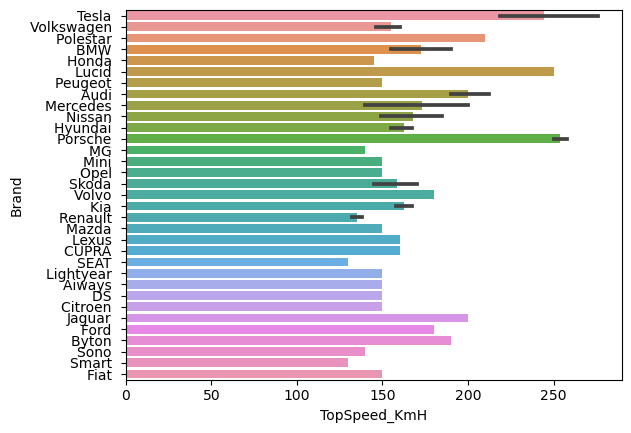

In [6]:
sns.barplot(data, y = "Brand", x = "TopSpeed_KmH")

## Which Plug Type is Giving the Fase Charge 

<Axes: xlabel='PlugType', ylabel='FastCharge_KmH'>

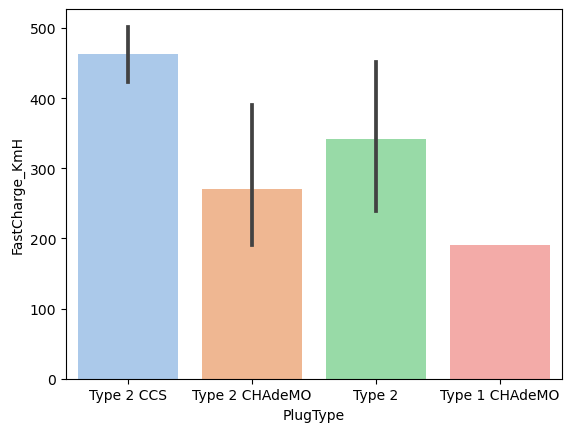

In [7]:
sns.barplot(data, x = "PlugType", y = "FastCharge_KmH", palette = "pastel")

## Power Train VS Efficiency

<Axes: xlabel='PowerTrain', ylabel='Efficiency_WhKm'>

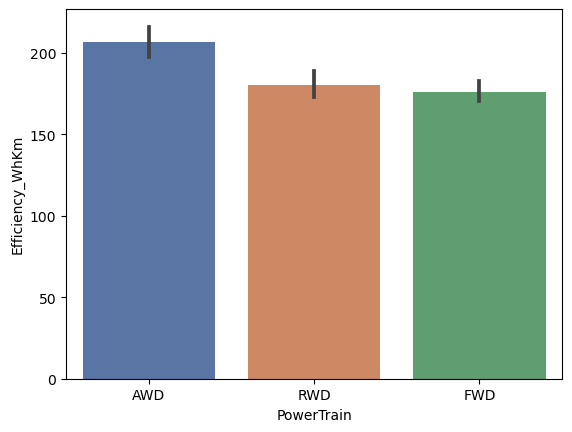

In [8]:
sns.barplot(data, x = "PowerTrain", y = "Efficiency_WhKm", palette = 'deep')

## Body Style VS Acceleration

<Axes: xlabel='BodyStyle', ylabel='AccelSec'>

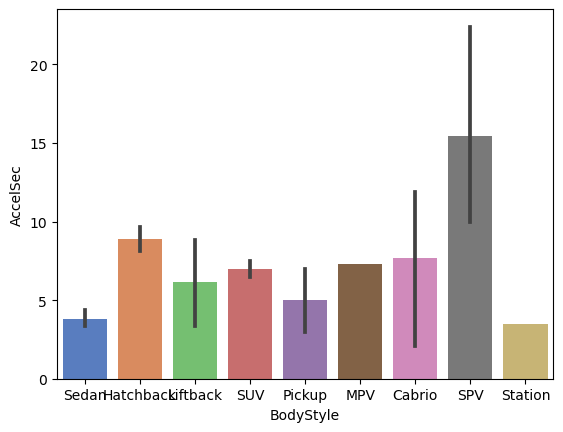

In [9]:
sns.barplot(data, x = "BodyStyle", y = "AccelSec", palette = 'muted')

## Vehicle Segment VS Top Speed Categorized by Rapid Charging

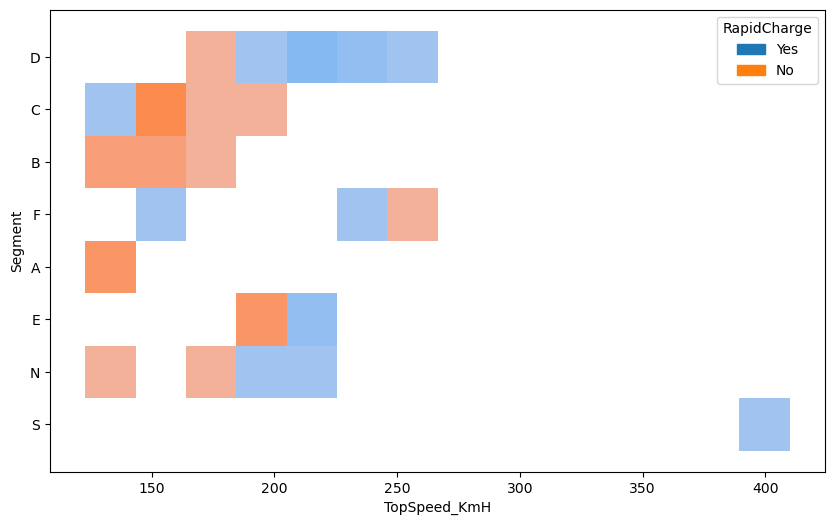

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data, y = "Segment", x = "TopSpeed_KmH", hue = "RapidCharge")
plt.show()

## Body Style VS Efficiency

<Axes: xlabel='BodyStyle', ylabel='Efficiency_WhKm'>

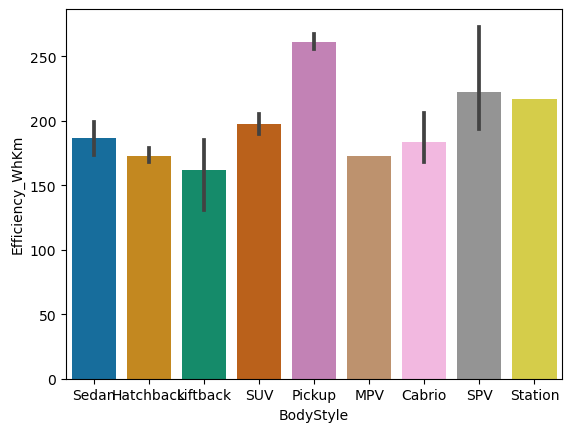

In [11]:
sns.barplot(data, x = "BodyStyle", y = "Efficiency_WhKm", palette = "colorblind")

## Which Segment is the most Efficient?

In [12]:
agg_data = data.groupby("Segment")["Efficiency_WhKm"].agg(['sum','count']).reset_index()
agg_data

,Segment,sum,count
0,A,1181,7
1,B,3712,22
2,C,5428,30
3,D,2800,15
4,E,2379,10
5,F,2327,12
6,N,1451,6
7,S,206,1


<Axes: xlabel='Segment', ylabel='count'>

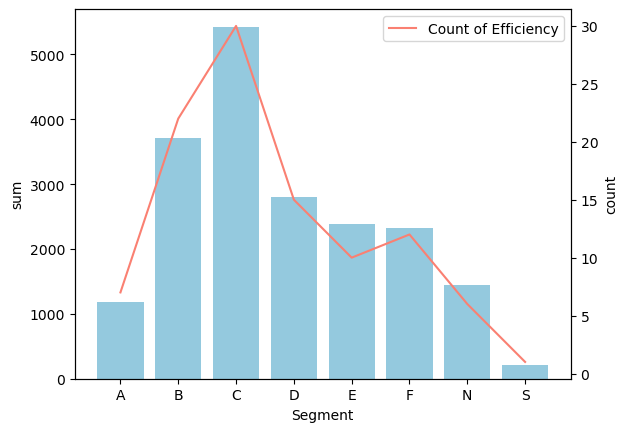

In [13]:
sns.barplot(x='Segment', y='sum', data=agg_data, color='skyblue', label='Sum of Efficiency')
ax2 = plt.twinx()
sns.lineplot(x='Segment', y='count', data=agg_data, color='salmon', label='Count of Efficiency', ax = ax2)

## Total EV Used Per State/UT

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


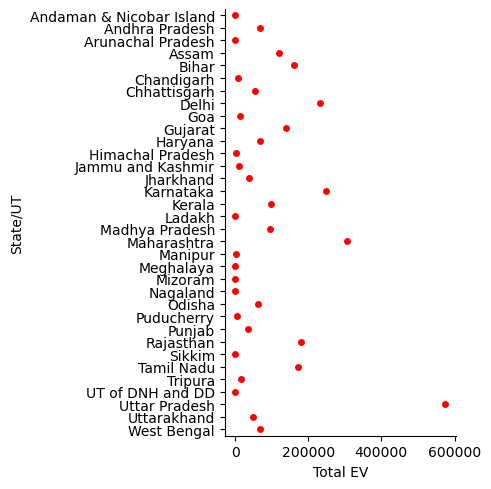

In [14]:
sns.catplot(data1, x = 'Total EV', y = 'State/UT', color = 'r')

## Box Plot of Scores

[Text(0.5, 1.0, 'Box Plot of Scores')]

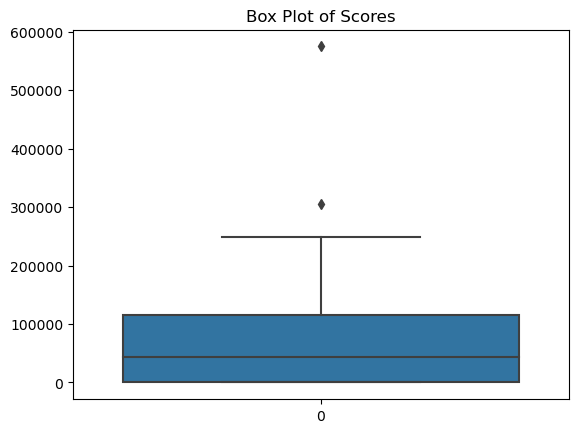

In [15]:
sns.boxplot(data=data1['Total EV']).set(title="Box Plot of Scores")

## One Hot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(data[['Brand','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment']]).toarray())
enc_df
enc_df.columns = enc.get_feature_names_out(['Brand','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment'])

df = data.join(enc_df)
pd.set_option('display.max_columns', None)
df.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Brand_Aiways,Brand_Audi,Brand_BMW,Brand_Byton,Brand_CUPRA,Brand_Citroen,Brand_DS,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Kia,Brand_Lexus,Brand_Lightyear,Brand_Lucid,Brand_MG,Brand_Mazda,Brand_Mercedes,Brand_Mini,Brand_Nissan,Brand_Opel,Brand_Peugeot,Brand_Polestar,Brand_Porsche,Brand_Renault,Brand_SEAT,Brand_Skoda,Brand_Smart,Brand_Sono,Brand_Tesla,Brand_Volkswagen,Brand_Volvo,RapidCharge_No,RapidCharge_Yes,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,Tesla,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Volkswagen,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Polestar,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,BMW,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Honda,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df = df.drop(['Brand','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment'], axis =1)
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand_Aiways,Brand_Audi,Brand_BMW,Brand_Byton,Brand_CUPRA,Brand_Citroen,Brand_DS,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Kia,Brand_Lexus,Brand_Lightyear,Brand_Lucid,Brand_MG,Brand_Mazda,Brand_Mercedes,Brand_Mini,Brand_Nissan,Brand_Opel,Brand_Peugeot,Brand_Polestar,Brand_Porsche,Brand_Renault,Brand_SEAT,Brand_Skoda,Brand_Smart,Brand_Sono,Brand_Tesla,Brand_Volkswagen,Brand_Volvo,RapidCharge_No,RapidCharge_Yes,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,940,5,55480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.0,160,270,167,250,5,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4.7,210,400,181,620,5,56440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6.8,180,360,206,560,5,68040,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.5,145,170,168,190,4,32997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,5,45000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,4.5,210,335,258,540,5,96050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100,5.9,200,325,194,440,5,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,5.1,200,375,232,450,5,65000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Splitting the data into Training and Testing

In [18]:
X = df.drop('PriceEuro', axis = 1)
y = df['PriceEuro']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=np.arange(0,len(X_train),1)

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

0.9734460675689984


TypeError: expected 1D vector for x

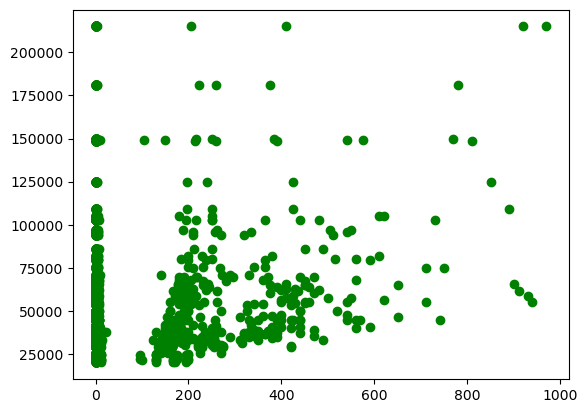

In [21]:
#use green as color for individual points
plt.plot(X, y, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

In [22]:
y_pred = reg.predict(X_test)

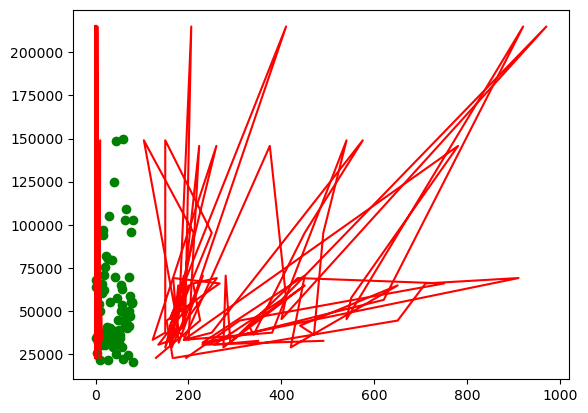

In [23]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred,color='r')

plt.show()

## Standard Scaling of Data

In [24]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(X)
X

array([[-0.93118617,  1.24088078,  0.88686204, ..., -0.36313652,
        -0.248708  , -0.09901475],
       [ 0.86716712, -0.44265992, -0.54853056, ..., -0.36313652,
        -0.248708  , -0.09901475],
       [-0.89788333,  0.71045015,  0.48814187, ..., -0.36313652,
        -0.248708  , -0.09901475],
       ...,
       [-0.49824927,  0.47982813, -0.10993838, ..., -0.36313652,
        -0.248708  , -0.09901475],
       [-0.76467197,  0.47982813,  0.28878179, ..., -0.36313652,
        -0.248708  , -0.09901475],
       [ 0.03459615,  0.24920612,  0.48814187, ..., -0.36313652,
        -0.248708  , -0.09901475]])

## Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [26]:
finalDf = pd.concat([principalDf, df[['PriceEuro']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PriceEuro
0,3.938260,0.869869,-0.902776,1.208881,0.205133,55480
1,-2.517334,0.778398,-0.854723,-0.760514,-2.396614,30000
2,2.751363,0.473868,-0.801647,1.238524,0.326239,56440
3,0.838968,-0.385778,-0.937867,-0.974414,-1.008379,68040
4,-2.802800,0.319277,-2.132259,0.176176,0.149673,32997
...,...,...,...,...,...,...
98,-1.195968,-1.147406,-0.349120,1.969909,-1.720234,45000
99,2.771601,-1.336707,0.898469,-2.875275,-0.155452,96050
100,0.381339,-0.509708,-0.373535,1.463872,-2.155561,50000
101,0.843502,-0.599129,-0.048104,1.248381,-2.247789,65000


## K Means Algorithm

In [27]:
from sklearn.cluster import KMeans
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(finalDf)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [28]:
print(kmean.labels_)

[3 1 3 3 1 0 1 1 1 3 3 1 1 3 1 1 2 1 1 1 1 3 1 0 3 1 1 3 1 1 3 1 1 3 1 1 3
 1 1 1 0 1 0 1 1 1 1 0 2 1 0 2 1 1 0 1 1 1 1 0 1 3 3 3 3 0 1 3 1 3 1 1 2 3
 1 1 3 1 3 2 1 0 1 1 3 1 1 3 1 1 0 1 1 3 1 1 1 3 1 0 3 3 3]


In [29]:
pd.Series(kmean.labels_).value_counts()

1    58
3    28
0    12
2     5
Name: count, dtype: int64

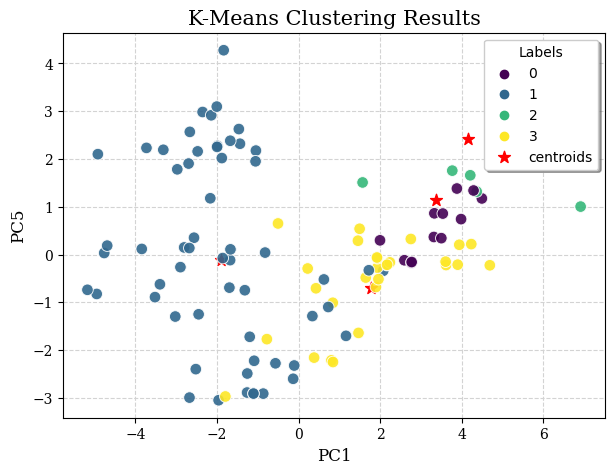

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=finalDf, x='PC1', y='PC5', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC5', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()